### Business Problem

### Data Information

In [6]:
import pandas as pd

# Define the data
data = {
    'Column': ['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
               'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
               'stays_in_week_nights', 'adults,children,babies', 'meal', 'country',
               'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
               'previous_bookings_not_canceled', 'reserved_room_type, assigned_room_type',
               'booking_changes', 'deposit_type', 'agent,company', 'days_in_waiting_list',
               'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',
               'reservation_status', 'reservation_status_date'],
    'Information': ['Indicates the type of hotel, where all reservations belong to the "Resort Hotel" type in this case.',
                    'Indicates whether the reservation is canceled or not (0 for reservations that are not canceled and 1 for reservations that are canceled).',
                    "The amount of time between the reservation date and the customer's arrival date at the hotel.",
                    'The year the customer arrives at the hotel.', 'The month the customer arrives at the hotel.',
                    "The week number of the customer's arrival at the hotel.",
                    'The day of the month the customer arrives at the hotel.',
                    'The number of weekend nights the customer stays.', 'The number of week nights the customer stays.',
                    'The number of adults, children, and babies in the reservation.',
                    'Describes what type of meal was booked (Breakfast only, Half board, Full board, or Undefined/SC – no meal package).', 'The country of origin of the customer.',
                    'Shows various market segments that individuals belong to when making reservations (e.g., Online Travel Agents, Offline Travel Agents, Corporate clients).',
                    'Specifies different channels through which bookings were made (e.g., online travel agencies, direct bookings with hotels/tour operators, corporate arrangements).',
                    'Indicates whether the guest is a repeated visitor (0=not repeated guest, 1=repeated guest).',
                    'The number of previous bookings that were canceled by the customer.',
                    'The number of previous bookings that were not canceled by the customer.',
                    'The type of room that was reserved and the type of room assigned to the customer.',
                    'The number of changes made to the reservation.', 'The type of deposit for the reservation.',
                    'Customer information regarding the agent and company.',
                    'The number of days the reservation was on the waiting list.',
                    'The type of customer (Transient, Contract, Group, Transient-Party).',
                    'The average daily rate for this reservation.', 'The number of required parking spaces.',
                    'The number of special requests.', 'The reservation status (Check-Out or Canceled).',
                    'The date when the reservation status was recorded.']
}

# Create the DataFrame
df_info = pd.DataFrame(data)

# Display the DataFrame
df_info

pd.options.display.max_columns = None

df_info

Column  \
0                                    hotel   
1                              is_canceled   
2                                lead_time   
3                        arrival_date_year   
4                       arrival_date_month   
5                 arrival_date_week_number   
6                arrival_date_day_of_month   
7                  stays_in_weekend_nights   
8                     stays_in_week_nights   
9                   adults,children,babies   
10                                    meal   
11                                 country   
12                          market_segment   
13                    distribution_channel   
14                       is_repeated_guest   
15                  previous_cancellations   
16          previous_bookings_not_canceled   
17  reserved_room_type, assigned_room_type   
18                         booking_changes   
19                            deposit_type   
20                           agent,company   
21                    days_in_waiting_list   
22                           customer_type   
23                                     adr   
24             required_car_parking_spaces   
25               total_of_special_requests   
26                      reservation_status   
27                 reservation_status_date   

                                          Information  
0   Indicates the type of hotel, where all reserva...  
1   Indicates whether the reservation is canceled ...  
2   The amount of time between the reservation dat...  
3         The year the customer arrives at the hotel.  
4        The month the customer arrives at the hotel.  
5   The week number of the customer's arrival at t...  
6   The day of the month the customer arrives at t...  
7    The number of weekend nights the customer stays.  
8       The number of week nights the customer stays.  
9   The number of adults, children, and babies in ...  
10  Describes what type of meal was booked (Breakf...  
11             The country of origin of the customer.  
12  Shows various market segments that individuals...  
13  Specifies different channels through which boo...  
14  Indicates whether the guest is a repeated visi...  
15  The number of previous bookings that were canc...  
16  The number of previous bookings that were not ...  
17  The type of room that was reserved and the typ...  
18     The number of changes made to the reservation.  
19           The type of deposit for the reservation.  
20  Customer information regarding the agent and c...  
21  The number of days the reservation was on the ...  
22  The type of customer (Transient, Contract, Gro...  
23       The average daily rate for this reservation.  
24             The number of required parking spaces.  
25                    The number of special requests.  
26    The reservation status (Check-Out or Canceled).  
27  The date when the reservation status was recor...

### Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [8]:
!pip install xgboost

### Reading File

In [9]:
df_hotel_booking = pd.read_csv('hotel_booking.csv')

In [10]:
# Making copy of Original Dataset
df = df_hotel_booking

In [11]:
df.sample(n=5,random_state=100).T

47013                 70144  \
hotel                                   City Hotel            City Hotel   
is_canceled                                      1                     1   
lead_time                                       13                     2   
arrival_date_year                             2016                  2017   
arrival_date_month                        February                  June   
arrival_date_week_number                         6                    24   
arrival_date_day_of_month                        3                    11   
stays_in_weekend_nights                          8                     1   
stays_in_week_nights                            21                     0   
adults                                           1                     2   
children                                       0.0                   0.0   
babies                                           0                     0   
meal                                            BB                    SC   
country                                        CHN                   PRT   
market_segment                           Online TA             Online TA   
distribution_channel                         TA/TO                 TA/TO   
is_repeated_guest                                0                     0   
previous_cancellations                           0                     0   
previous_bookings_not_canceled                   0                     0   
reserved_room_type                               A                     A   
assigned_room_type                               A                     A   
booking_changes                                  0                     0   
deposit_type                            No Deposit            No Deposit   
agent                                          9.0                  10.0   
company                                        NaN                   NaN   
days_in_waiting_list                             0                     0   
customer_type                            Transient             Transient   
adr                                          75.36                 100.0   
required_car_parking_spaces                      0                     0   
total_of_special_requests                        0                     0   
reservation_status                        Canceled              Canceled   
reservation_status_date                 2016-01-29            2017-06-09   
name                            Dr. Madison Powell           Angela Cruz   
email                                Dr._P@aol.com  Angela.C31@gmail.com   
phone-number                          943-239-8150          709-762-8436   
credit_card                       ************2171      ************6194   

                                                      28651  \
hotel                                          Resort Hotel   
is_canceled                                               0   
lead_time                                                 3   
arrival_date_year                                      2016   
arrival_date_month                                  October   
arrival_date_week_number                                 41   
arrival_date_day_of_month                                 8   
stays_in_weekend_nights                                   0   
stays_in_week_nights                                      1   
adults                                                    2   
children                                                0.0   
babies                                                    0   
meal                                                     BB   
country                                                 PRT   
market_segment                                    Online TA   
distribution_channel                                  TA/TO   
is_repeated_guest                                         0   
previous_cancellations                                    0   
previous_bookings_not_canceled     

### Data Understanding

In [12]:
df.shape

(119390, 36)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##### There are 4 variables of float datatype: 
children,agent,company,adr]

##### There are 16 variables of integer datatype:
'is_canceled', 'lead_time', 'arrival_date_year',
'arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights',
'stays_in_week_nights','adults', 'babies','is_repeated_guest',
'previous_cancellations','previous_bookings_not_canceled',booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']

##### There are 16 variables of object datatype:
'hotel', 'arrival_date_month', 'meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type',
'assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date','name', 'email', 'phone-number','credit_card']
           
##### Note :: We can observe there are missing values present in some columns.


In [14]:
# Checking datatypes of all variables
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [15]:
# Description of numeric variables
df.select_dtypes(include=np.number).describe().T

count         mean         std      min  \
is_canceled                     119390.0     0.370416    0.482918     0.00   
lead_time                       119390.0   104.011416  106.863097     0.00   
arrival_date_year               119390.0  2016.156554    0.707476  2015.00   
arrival_date_week_number        119390.0    27.165173   13.605138     1.00   
arrival_date_day_of_month       119390.0    15.798241    8.780829     1.00   
stays_in_weekend_nights         119390.0     0.927599    0.998613     0.00   
stays_in_week_nights            119390.0     2.500302    1.908286     0.00   
adults                          119390.0     1.856403    0.579261     0.00   
children                        119386.0     0.103890    0.398561     0.00   
babies                          119390.0     0.007949    0.097436     0.00   
is_repeated_guest               119390.0     0.031912    0.175767     0.00   
previous_cancellations          119390.0     0.087118    0.844336     0.00   
previous_bookings_not_canceled  119390.0     0.137097    1.497437     0.00   
booking_changes                 119390.0     0.221124    0.652306     0.00   
agent                           103050.0    86.693382  110.774548     1.00   
company                           6797.0   189.266735  131.655015     6.00   
days_in_waiting_list            119390.0     2.321149   17.594721     0.00   
adr                             119390.0   101.831122   50.535790    -6.38   
required_car_parking_spaces     119390.0     0.062518    0.245291     0.00   
total_of_special_requests       119390.0     0.571363    0.792798     0.00   

                                    25%       50%     75%     max  
is_canceled                        0.00     0.000     1.0     1.0  
lead_time                         18.00    69.000   160.0   737.0  
arrival_date_year               2016.00  2016.000  2017.0  2017.0  
arrival_date_week_number          16.00    28.000    38.0    53.0  
arrival_date_day_of_month          8.00    16.000    23.0    31.0  
stays_in_weekend_nights            0.00     1.000     2.0    19.0  
stays_in_week_nights               1.00     2.000     3.0    50.0  
adults                             2.00     2.000     2.0    55.0  
children                           0.00     0.000     0.0    10.0  
babies                             0.00     0.000     0.0    10.0  
is_repeated_guest                  0.00     0.000     0.0     1.0  
previous_cancellations             0.00     0.000     0.0    26.0  
previous_bookings_not_canceled     0.00     0.000     0.0    72.0  
booking_changes                    0.00     0.000     0.0    21.0  
agent                              9.00    14.000   229.0   535.0  
company                           62.00   179.000   270.0   543.0  
days_in_waiting_list               0.00     0.000     0.0   391.0  
adr                               69.29    94.575   126.0  5400.0  
required_car_parking_spaces        0.00     0.000     0.0     8.0  
total_of_special_requests          0.00     0.000     1.0     5.0

In [16]:
# Description of categorical variables
df.select_dtypes(exclude=np.number).describe().T

count  unique                  top    freq
hotel                    119390       2           City Hotel   79330
arrival_date_month       119390      12               August   13877
meal                     119390       5                   BB   92310
country                  118902     177                  PRT   48590
market_segment           119390       8            Online TA   56477
distribution_channel     119390       5                TA/TO   97870
reserved_room_type       119390      10                    A   85994
assigned_room_type       119390      12                    A   74053
deposit_type             119390       3           No Deposit  104641
customer_type            119390       4            Transient   89613
reservation_status       119390       3            Check-Out   75166
reservation_status_date  119390     926           2015-10-21    1461
name                     119390   81503      Michael Johnson      48
email                    119390  115889  Michael.C@gmail.com       6
phone-number             119390  119390         669-792-1661       1
credit_card              119390    9000     ************4923      28

In [17]:
# Checking no. of categories and count of categories in each categorical column
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('-------------------------------------')

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
-------------------------------------
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64
-------------------------------------
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64
-------------------------------------
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64
-------------------------------------
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefin

In [18]:
# Checking duplicate values in dataset
df[df.duplicated()]

Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, agent, company, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email, phone-number, credit_card]
Index: []

In [19]:
# reservation_status,name,email,phone-number,credit_card variables will add moise to the data, 
# so can be dropped from further analysis.
# Also columns reservation_status_date can be dropped since we already have lead_time column giving same information.
df.drop(['phone-number','email','name','credit_card','reservation_status','reservation_status_date'],axis=1,inplace=True)

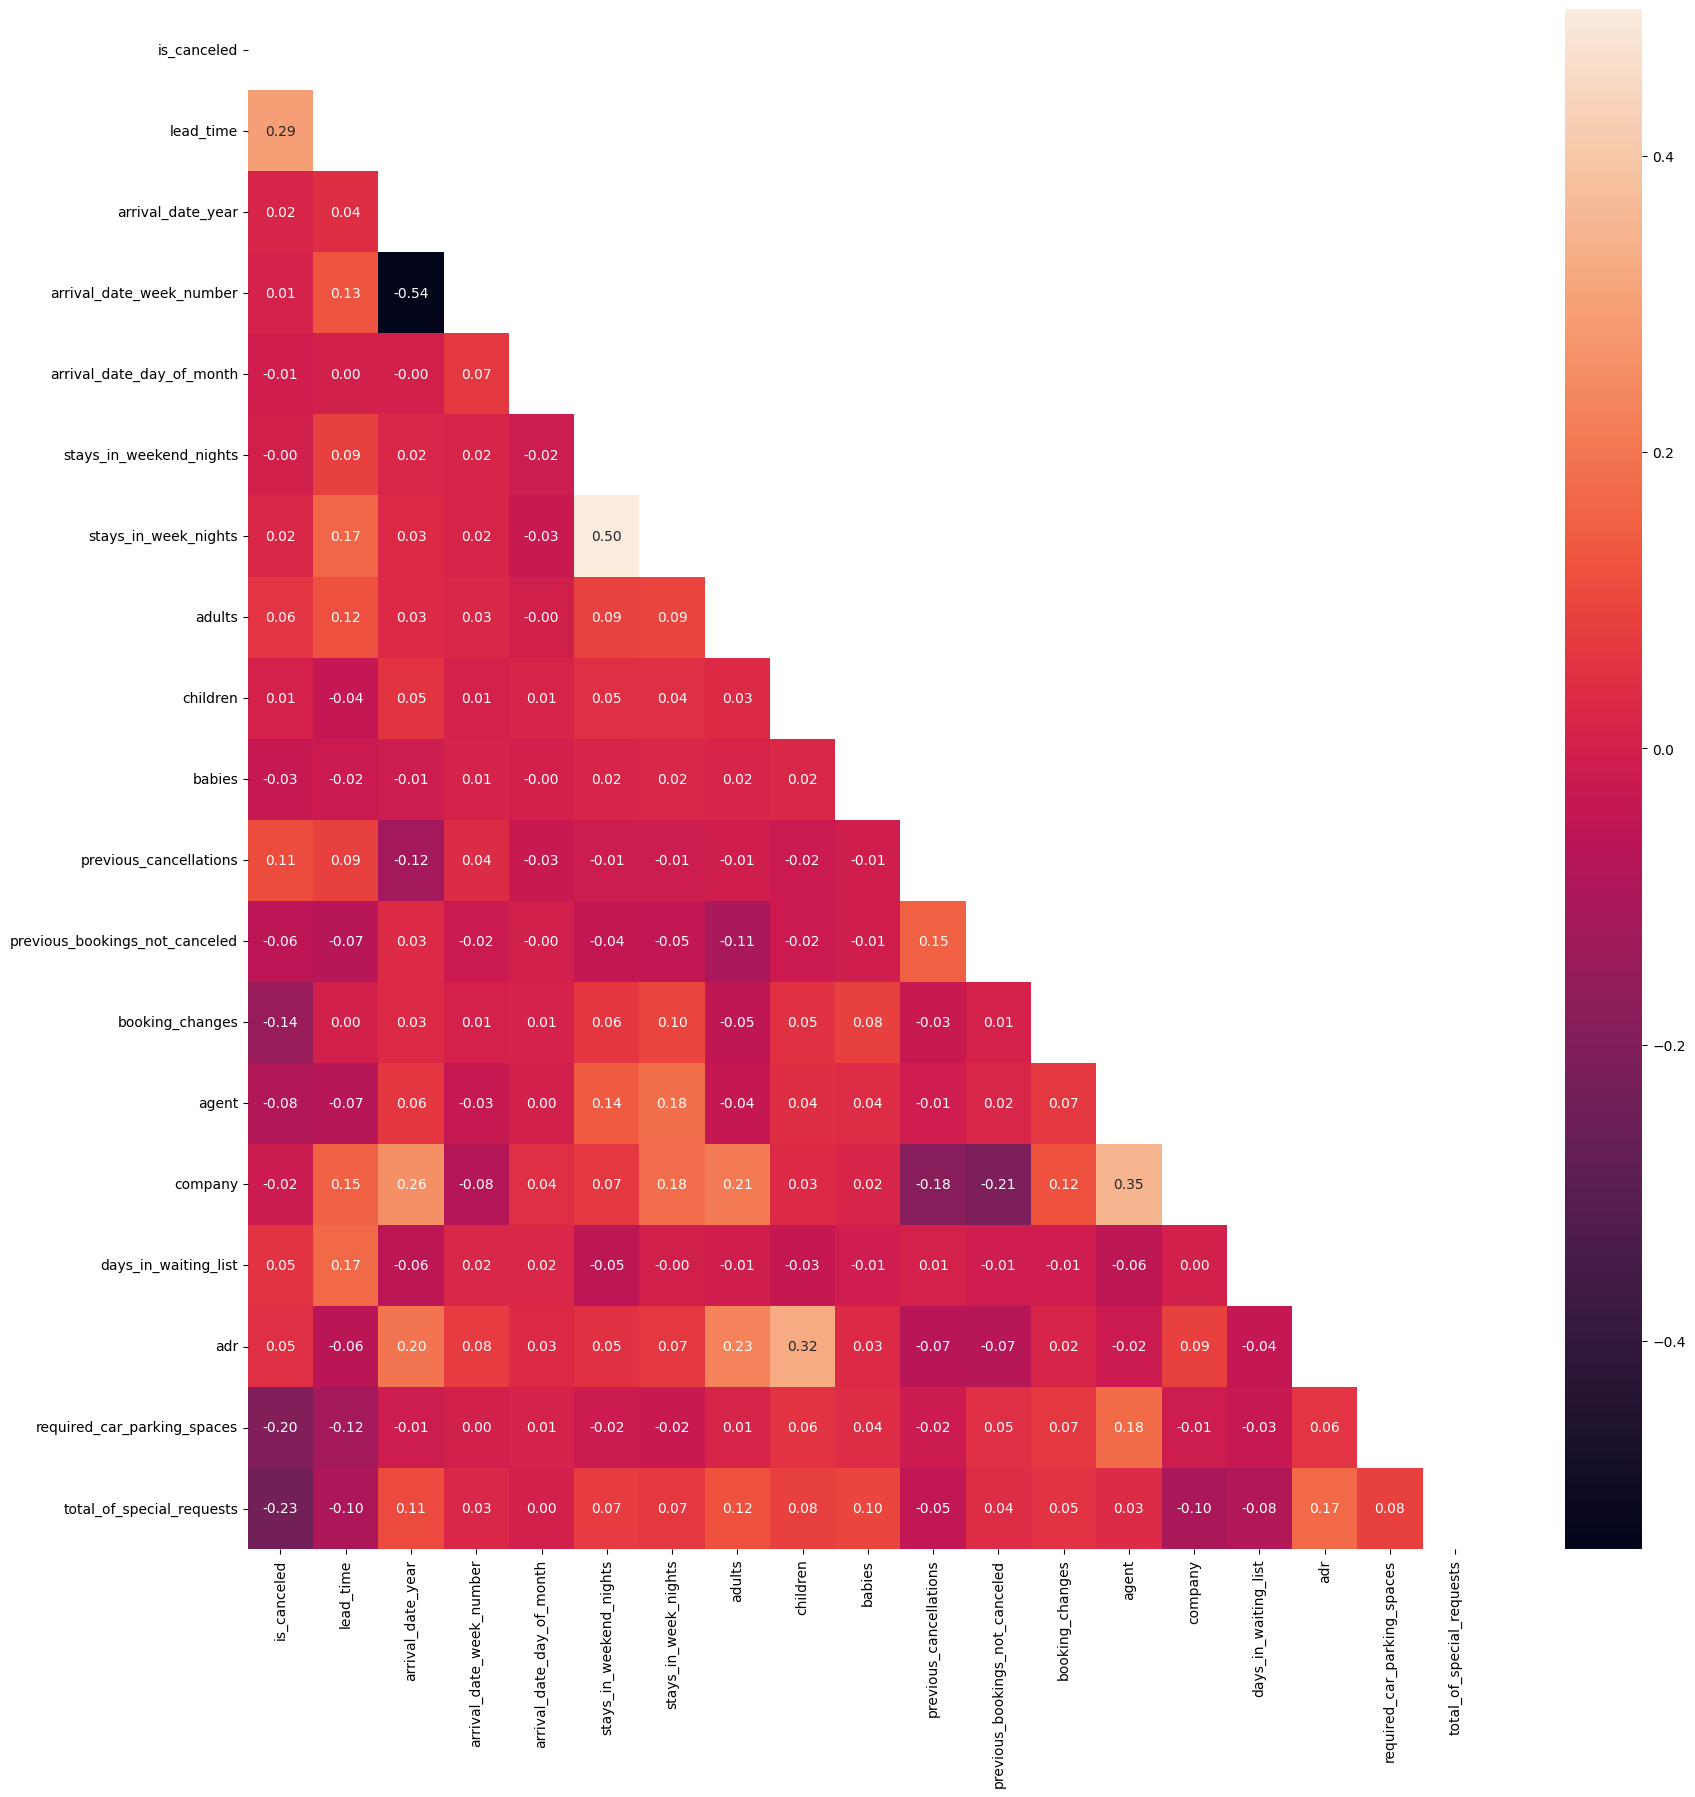

In [20]:
# Checking correaltion between all numerical columns.
# removing is_repeated_guest volumn from heatmap as it is categorical encoded numrical column.
mask = np.triu(np.ones_like(df.drop('is_repeated_guest',axis=1).select_dtypes(exclude='object').corr()))
plt.subplots(figsize=(20,20))
sns.heatmap(df.drop('is_repeated_guest',axis=1).select_dtypes(exclude='object').corr(),annot=True,fmt='.2f',mask=mask)
plt.show()

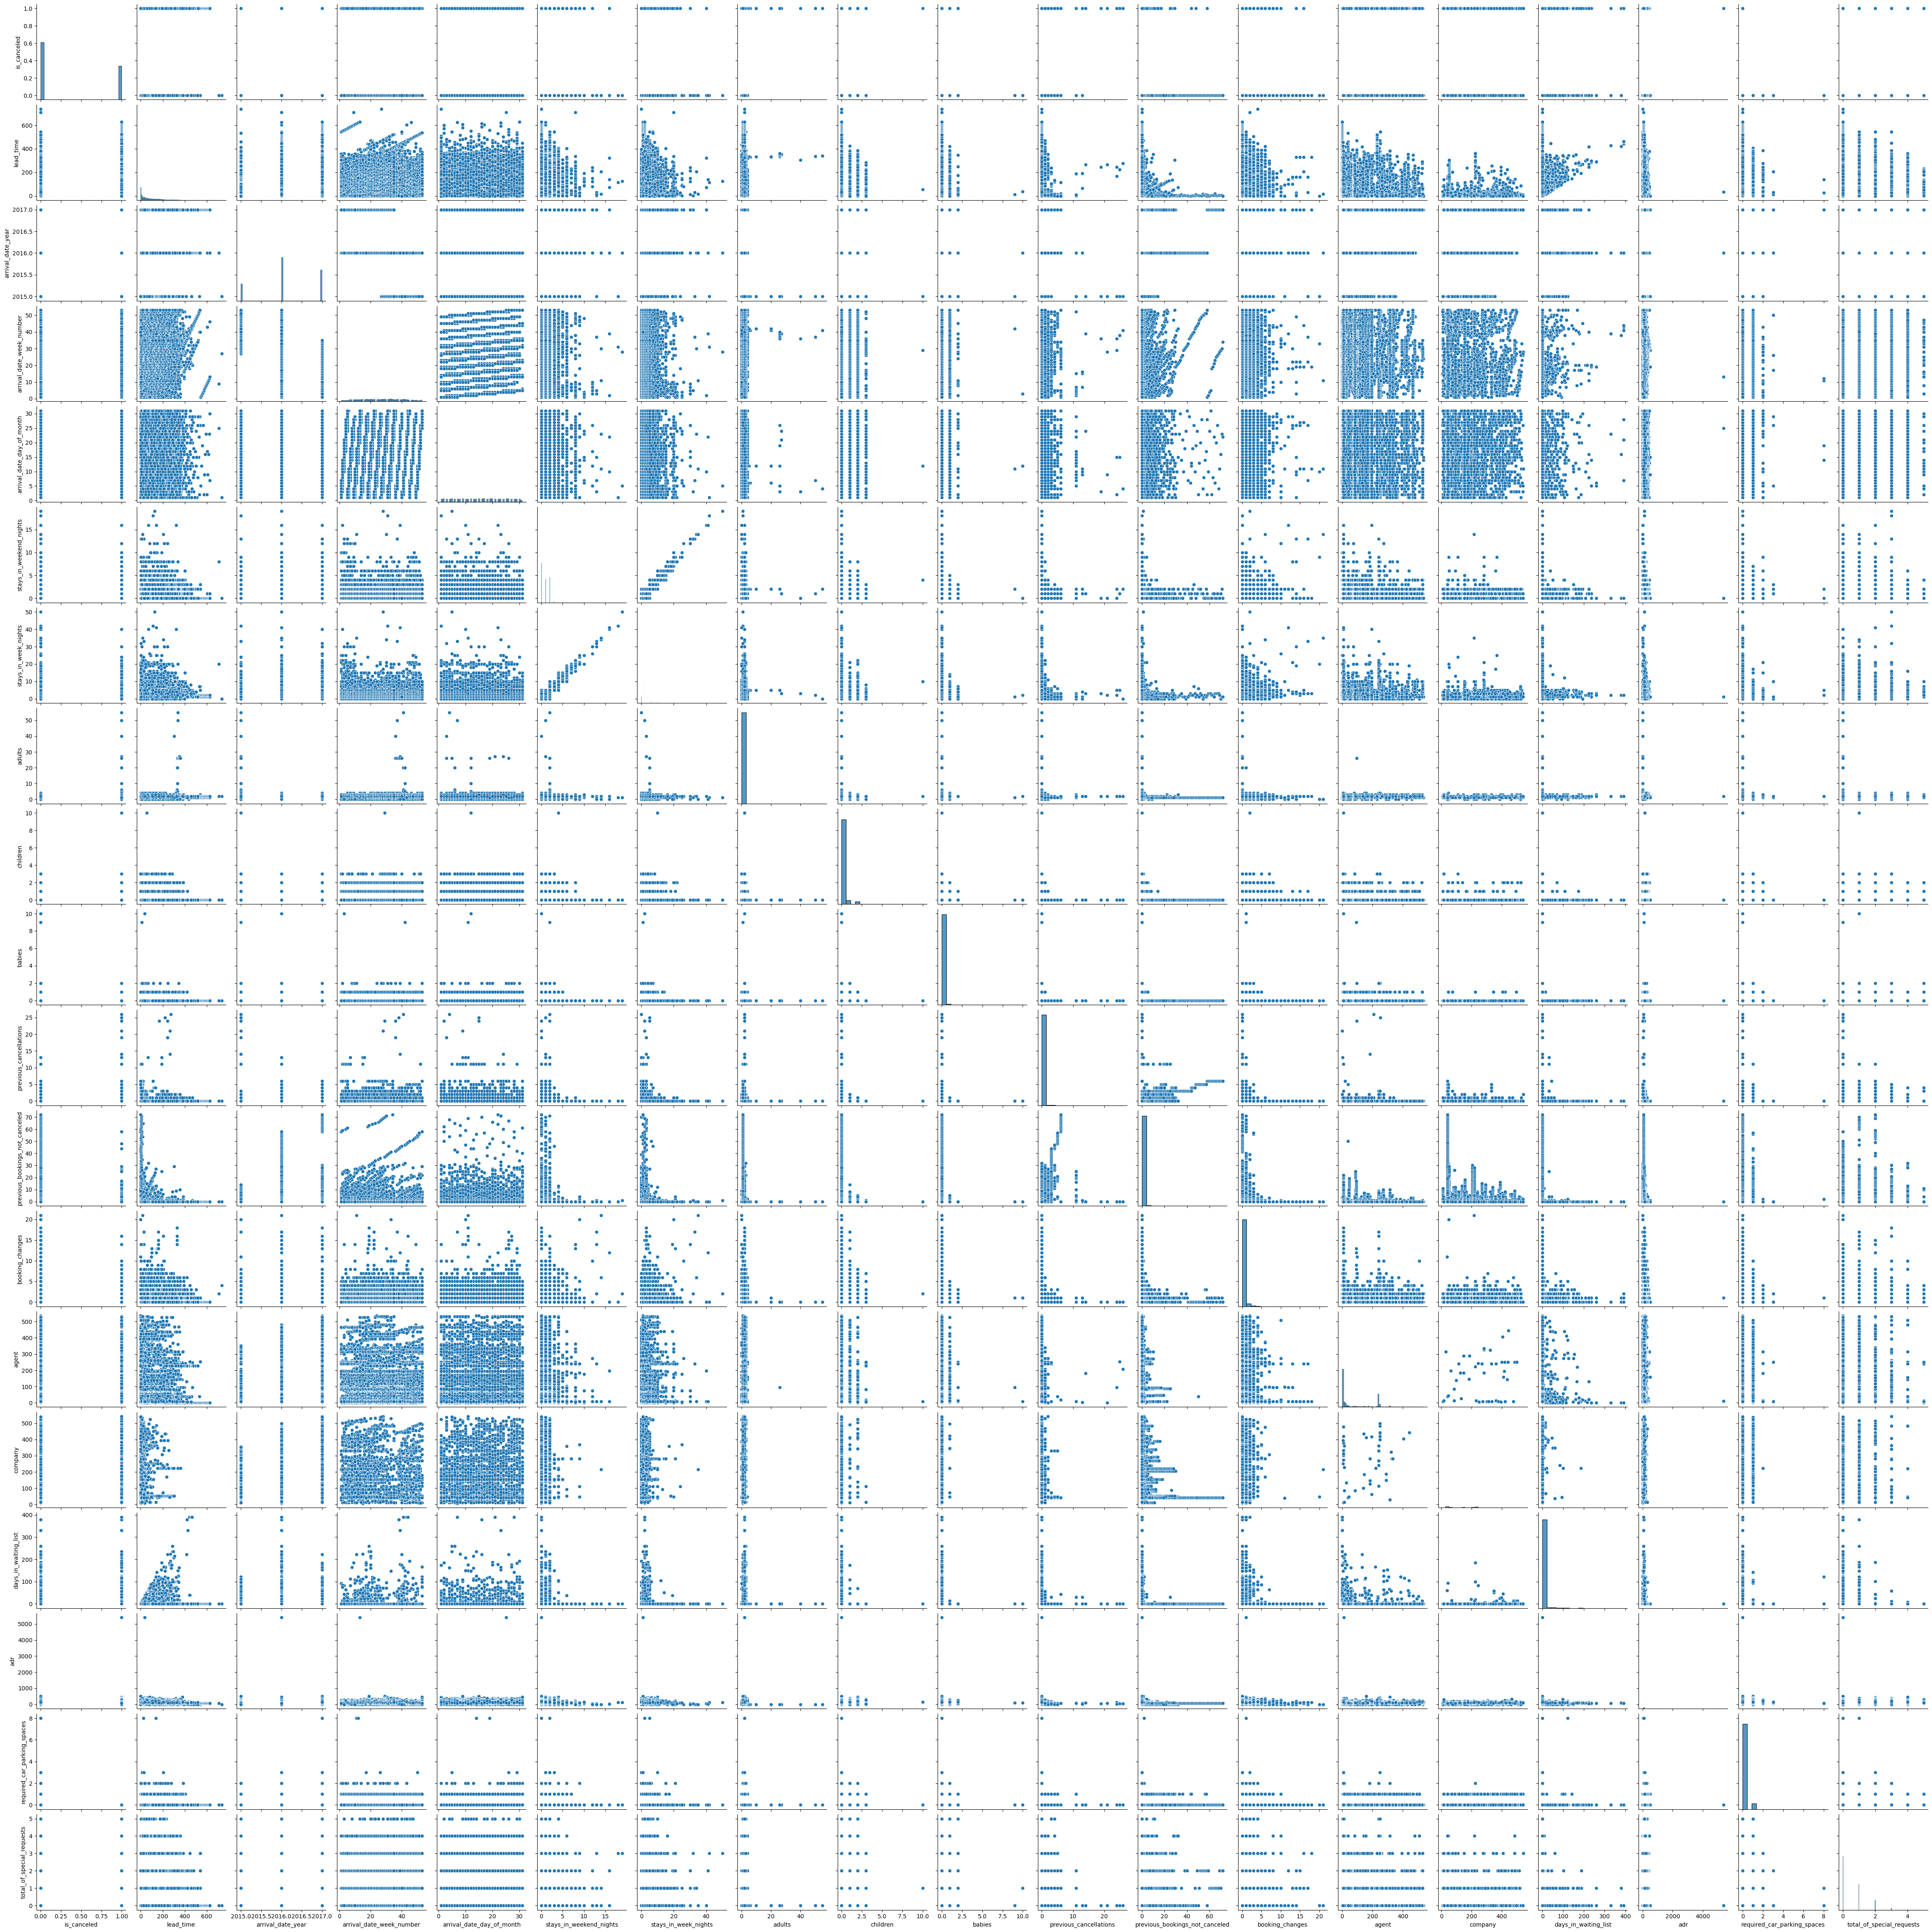

In [23]:
sns.pairplot(df.drop('is_repeated_guest',axis=1).select_dtypes(include=np.number))

In [21]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

### Null Values

In [22]:
df.isnull().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
is_repeated_guest                      0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
previous_cancellations                 0
distribution_channel                   0
is_canceled                            0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_nights                   0
stays_in_weekend_nights                0
arrival_date_day

In [23]:
df.isnull().sum().sort_values(ascending = False)/len(df)*100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
hotel                              0.000000
is_repeated_guest                  0.000000
required_car_parking_spaces        0.000000
adr                                0.000000
customer_type                      0.000000
days_in_waiting_list               0.000000
deposit_type                       0.000000
booking_changes                    0.000000
assigned_room_type                 0.000000
reserved_room_type                 0.000000
previous_bookings_not_canceled     0.000000
previous_cancellations             0.000000
distribution_channel               0.000000
is_canceled                        0.000000
market_segment                     0.000000
meal                               0.000000
babies                             0.000000
adults                             0.000000
stays_in_week_nights            

### Null Value Imputation

In [24]:
# There is no point to go with company column it contains near about total null values. so dropping the variable
# Also agent column will mostly contain agents of Europe thus it will not provide much information in analysis.
df.drop(['company','agent'],axis=1,inplace=True)

In [25]:
df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [26]:
# we can impute the null values of country column by mode because dtype of country column is object
print('Mode value of the country variable is ',df['country'].mode())
#Imputation
df['country']= df['country'].fillna('PRT')

Mode value of the country variable is  0    PRT
Name: country, dtype: object


In [27]:
# we can impute the null values of children column by median because it contains outliers
df['children'] = df['children'].fillna(df['children'].median())

In [28]:
df.isnull().sum().sum()

0

### Outliers

In [29]:
# Null values removed new numerical and categorical dataframe created.

In [30]:
df_num = df.select_dtypes(include=np.number)
df_num.drop('is_repeated_guest',axis=1,inplace=True)

In [31]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat['is_repeated_guest'] = df['is_repeated_guest']

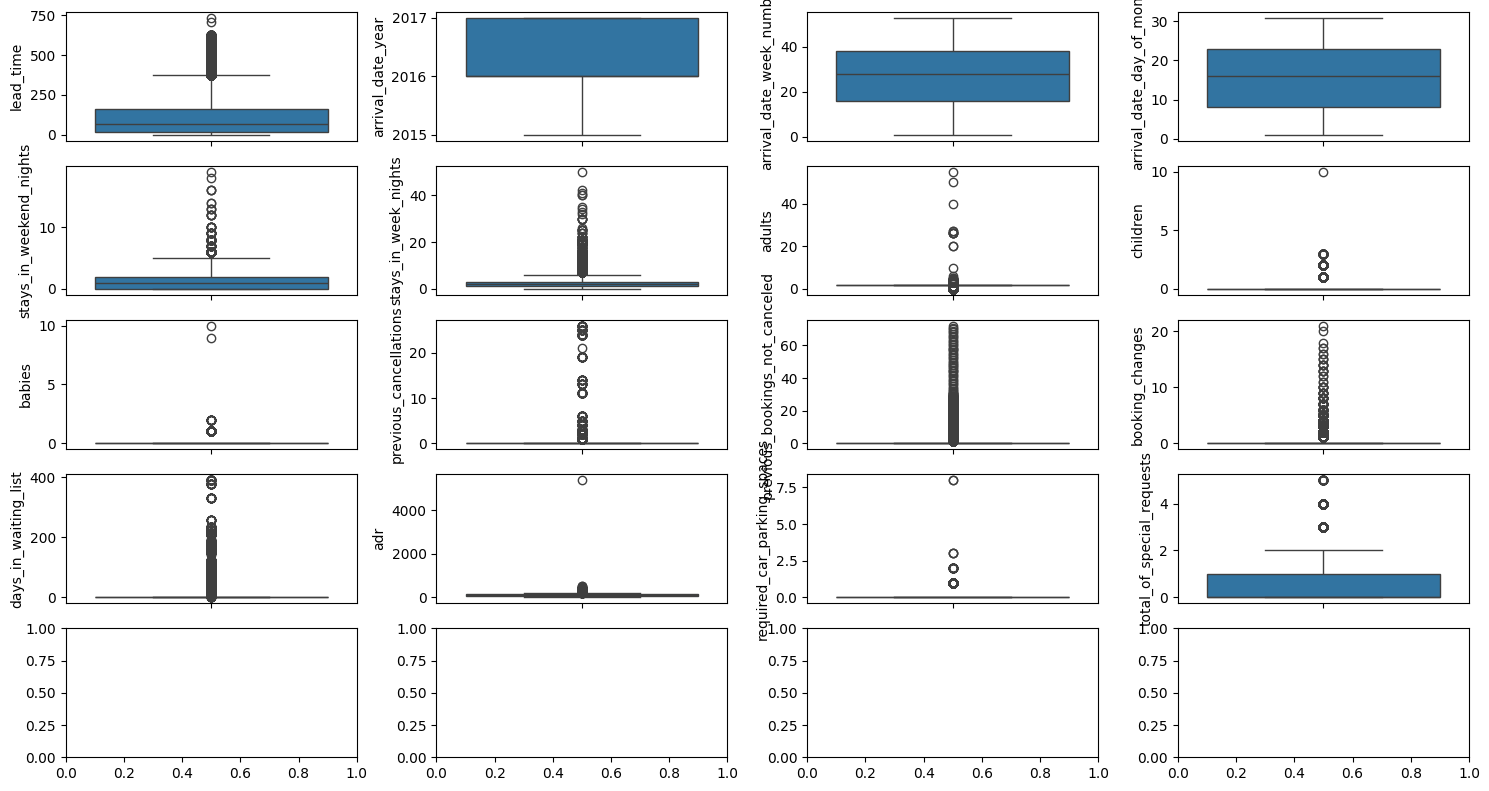

In [32]:
fig,ax = plt.subplots(nrows=5,ncols=4,figsize = (15,8))
for variable,subplot in zip(df_num.drop('is_canceled',axis=1).columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
plt.tight_layout()
plt.show()

### Outlier Treatment

Not including following columns in outlier treatment as they have few unique numerical values and by capping the outliers they will be capped to zero by the rule of IQR.
1. adults
2. children
3. babies
4. previous_cancellations
5. booking_changes
6. days_in_waiting_list
7. required_car_parking_spaces
8. previous_bookings_not_canceled

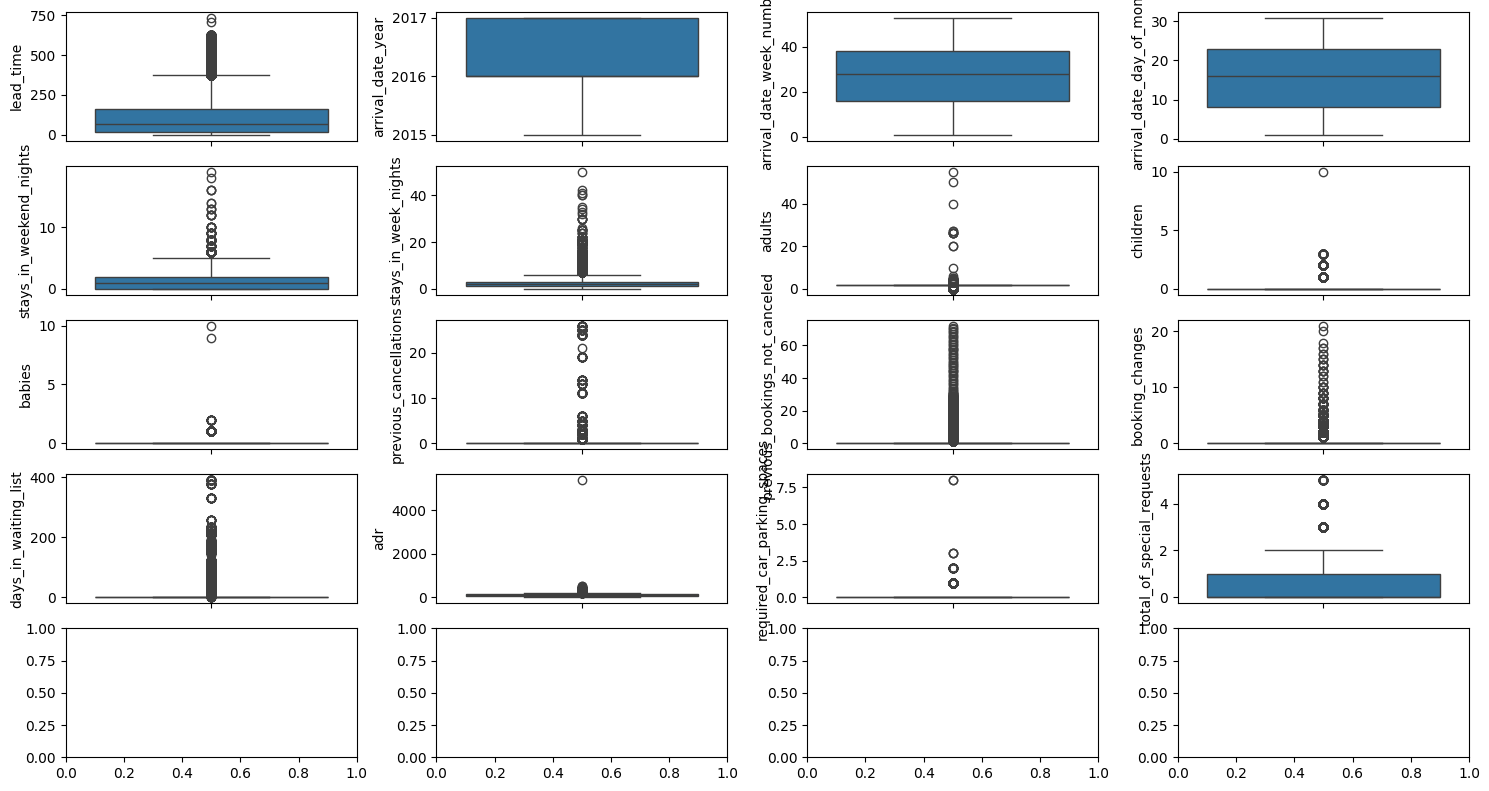

In [33]:
fig,ax = plt.subplots(nrows=5,ncols=4,figsize = (15,8))
for variable,subplot in zip(df_num.drop('is_canceled',axis=1).columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
plt.tight_layout()
plt.show()


Outliers are retained in the hotel cancellation dataset to maintain data integrity and preserve critical information. Removing them could distort the data and lead to biased insights. Robust algorithms like Random Forests handle outliers effectively. Additionally, examining outliers helps determine if they are genuine anomalies or errors. We avoid removing outliers to prevent data loss.


### Feature Engineering

To handle the country column with 177 unique values without using dummy encoding, you can categorize countries by their continents. This involves creating a mapping of each country to its corresponding continent and then applying this mapping to your DataFrame. This approach reduces dimensionality and retains important geographical information. After mapping, you can use encoding techniques like one-hot encoding or label encoding on the continent column as needed for your analysis or machine learning model. This method streamlines the data while maintaining its relevance and interpretability.

In [34]:
africa = ['AGO', 'MOZ', 'ZAF', 'ZMB', 'CPV', 'ZWE', 'DZA', 'NGA', 'SEN', 'EGY', 'TUN', 'CIV', 'COM', 'UGA', 'BDI', 'RWA', 'DJI', 'STP', 'ETH', 'TGO', 'KEN', 'GNB', 'MLI', 'NAM', 'BFA', 'LBY', 'MWI', 'MDG', 'GAB', 'GHA', 'TZA', 'SLE']
asia = ['ARE', 'IND', 'CHN', 'JPN', 'KOR', 'IRN', 'KAZ', 'PAK', 'IDN', 'PHL', 'THA', 'LBN', 'KWT', 'BHR', 'ARM', 'LKA', 'MYS', 'SGP', 'VNM', 'UZB', 'NPL', 'MAC', 'TJK', 'IRQ', 'KHM', 'SYR', 'HKG', 'JOR', 'PSE', 'KOR', 'LAO', 'MMR']
europe = ['PRT', 'GBR', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'POL', 'DEU', 'BEL', 'CHE', 'GRC', 'ITA', 'NLD', 'DNK', 'RUS', 'SWE', 'EST', 'CZE', 'FIN', 'BWA', 'LUX', 'SVN', 'ALB', 'MDA', 'SRB', 'AUT', 'BLR', 'LTU', 'TUR', 'HRV', 'HUN', 'LVA', 'SMR', 'ISL', 'SVK', 'GIB', 'AND', 'JEY', 'GGY', 'LIE', 'MCO', 'MNE', 'FRO']
north_america = ['USA', 'MEX', 'PRI', 'CAN', 'DMA', 'BLZ', 'ATG', 'SLV', 'KNA', 'VGB', 'HTI', 'TTO', 'GRD', 'CYM', 'BHS', 'ABW', 'AIA', 'GUY', 'LCA', 'CRI', 'HND', 'PAN', 'NIC', 'BRB']
south_america = ['ARG', 'BRA', 'CHL', 'COL', 'URY', 'PER', 'VEN', 'GUF', 'PRY', 'BOL', 'SUR']
oceania = ['AUS', 'NZL', 'FJI', 'PNG', 'PYF', 'NCL', 'KIR']
antarctica = ['ATA']

def get_continent(country_code):
    if country_code in africa:
        return 'Africa'
    elif country_code in asia:
        return 'Asia'
    elif country_code in europe:
        return 'Europe'
    elif country_code in north_america:
        return 'North America'
    elif country_code in south_america:
        return 'South America'
    elif country_code in oceania:
        return 'Oceania'
    elif country_code in antarctica:
        return 'Antarctica'
    else:
        return 'Unknown'

df_cat['continent'] = df_cat['country'].apply(get_continent)

In [35]:
df_cat['continent'].value_counts()

continent
Europe           108377
Unknown            2738
South America      2680
North America      2241
Asia               2026
Africa              822
Oceania             504
Antarctica            2
Name: count, dtype: int64

In [36]:
df_cat.drop('country',axis=1,inplace=True)

In [37]:
# creating new dataframe for Data Analysis with removing outliers from numerical columns and treating null values.
df1 = pd.concat([df.select_dtypes(include='object'),df_num,df_cat['continent']],axis=1)
df1.head()

hotel arrival_date_month meal country market_segment  \
0  Resort Hotel               July   BB     PRT         Direct   
1  Resort Hotel               July   BB     PRT         Direct   
2  Resort Hotel               July   BB     GBR         Direct   
3  Resort Hotel               July   BB     GBR      Corporate   
4  Resort Hotel               July   BB     GBR      Online TA   

  distribution_channel reserved_room_type assigned_room_type deposit_type  \
0               Direct                  C                  C   No Deposit   
1               Direct                  C                  C   No Deposit   
2               Direct                  A                  C   No Deposit   
3            Corporate                  A                  A   No Deposit   
4                TA/TO                  A                  A   No Deposit   

  customer_type  is_canceled  lead_time  arrival_date_year  \
0     Transient            0        342               2015   
1     Transient            0        737               2015   
2     Transient            0          7               2015   
3     Transient            0         13               2015   
4     Transient            0         14               2015   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   previous_cancellations  previous_bookings_not_canceled  booking_changes  \
0                       0                               0                3   
1                       0                               0                4   
2                       0                               0                0   
3                       0                               0                0   
4                       0                               0                0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests continent  
0                          0    Europe  
1                          0    Europe  
2                          0    Europe  
3                          0    Europe  
4                          1    Europe

### Data Analysis

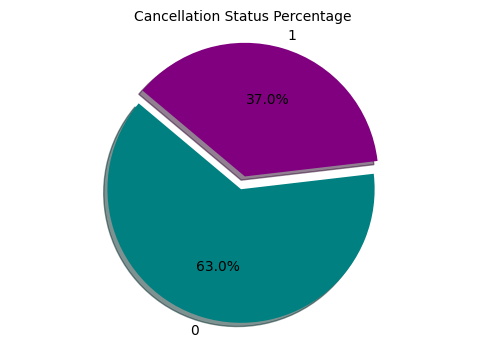

In [38]:
# Calculate cancellation percentages
cancel_percentages = df1['is_canceled'].value_counts() / df1['is_canceled'].count() * 100

# Set explode values for the slices
explode = (0.1, 0)

# Define colors for the pie chart
colors = ['teal', 'purple']

# Set font size for labels and percentages
plt.rcParams['font.size'] = 10

# Plot the pie chart
plt.figure(figsize=(6,4))
plt.pie(cancel_percentages, labels=cancel_percentages.index, autopct='%1.1f%%', shadow=True, explode=explode, colors=colors, startangle=140)

# Set the title
plt.title('Cancellation Status Percentage', fontsize=10)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()

Based on the charts above, it shows that the target variable indicates booking statuses: 75,166 instances where bookings were not cancelled (0) and 44,224 instances where bookings were cancelled (1), representing 63.0% and 37.0% of the total respectively

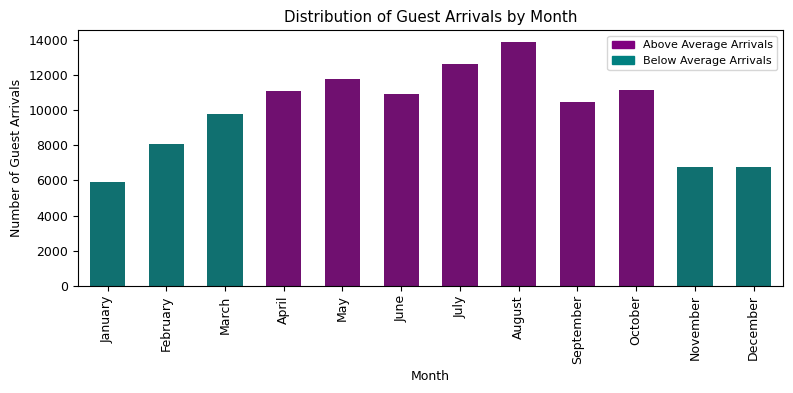

Months with above-average arrivals: ['April', 'May', 'June', 'July', 'August', 'September', 'October']
Months with below-average arrivals: ['January', 'February', 'March', 'November', 'December']


In [39]:
from matplotlib.patches import Patch
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]

# Set 'arrival_date_month' as a categorical variable with the defined order
df1['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'], categories=months_order, ordered=True)

# Group data by month and calculate the number of guest arrivals
monthly_guest_arrivals = df1.groupby('arrival_date_month')['is_canceled'].count()

# Calculate the average number of arrivals per month
average_arrivals_per_month = monthly_guest_arrivals.mean()

# Determine colors based on comparison with the average
colors = ['purple' if arrivals > average_arrivals_per_month else 'teal' for arrivals in monthly_guest_arrivals]

# Set font size for labels and percentages
plt.rcParams['font.size'] = 9

# Create the bar plot for monthly guest arrivals with resized bars
plt.figure(figsize=(8, 4))
bars = sns.barplot(x=monthly_guest_arrivals.index, y=monthly_guest_arrivals.values, palette=colors, width=0.6)
plt.xlabel("Month")
plt.ylabel("Number of Guest Arrivals")
plt.title("Distribution of Guest Arrivals by Month")
plt.xticks(rotation=90)
plt.tight_layout()

# Add custom legend
legend_handles = [Patch(color='purple', label='Above Average Arrivals'),
                  Patch(color='teal', label='Below Average Arrivals')]
plt.legend(handles=legend_handles, loc='upper right',fontsize=8)

# Display the plot
plt.show()

# Create a list of months with above-average and below-average arrivals
above_average_months = monthly_guest_arrivals[monthly_guest_arrivals > average_arrivals_per_month].index
below_average_months = monthly_guest_arrivals[monthly_guest_arrivals <= average_arrivals_per_month].index
print(f"Months with above-average arrivals: {list(above_average_months)}")
print(f"Months with below-average arrivals: {list(below_average_months)}")

According to the data:

The months with the highest guest arrivals are July, August. The month with the lowest guest arrivals is January.

This distribution suggests:

Summer and autumn months (April to October) typically experience higher guest arrivals. Winter months (January, February, March, and December) tend to have lower guest arrivals...

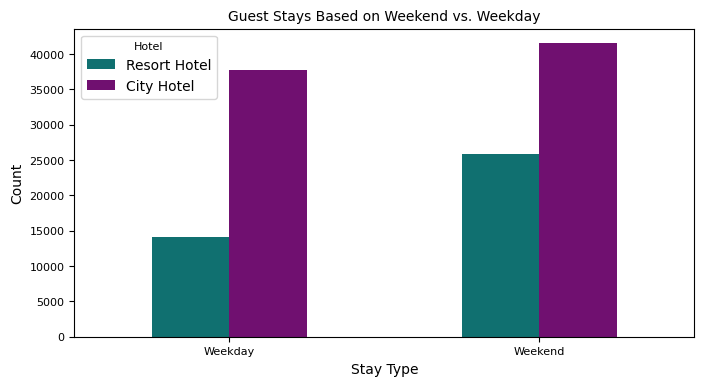

In [40]:
# Create a new column 'stay_type' to categorize stays as 'Weekend' or 'Weekday'
df1['stay_type'] = df1.apply(lambda row: 'Weekend' if row['stays_in_weekend_nights'] > 0 else 'Weekday', axis=1)

# Set font size for labels and percentages
plt.rcParams['font.size'] = 8

# Create a bar plot
plt.figure(figsize=(8,4))
sns.countplot(data=df1, x='stay_type', hue='hotel', palette=["teal", "purple"],width=0.5)
plt.title('Guest Stays Based on Weekend vs. Weekday', fontsize=10)
plt.xlabel('Stay Type', fontsize=10)  # Adjust font size to 16
plt.ylabel('Count', fontsize=10)
plt.legend(title='Hotel', fontsize=10)
plt.show()

Guests prefer shorter weekend getaways (1-2 nights). Stays on weekdays show a more varied distribution, ranging from 1 to 5 nights.

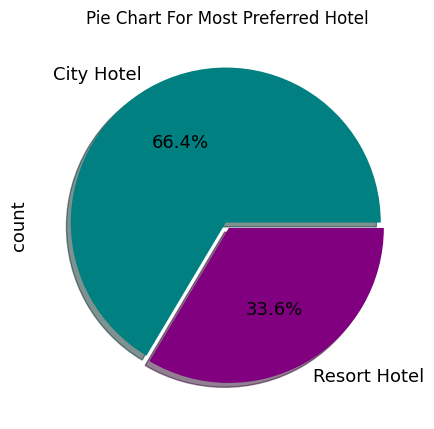

In [41]:
#### Create a pie chart for the most preferred hotel
colors = ["teal", "purple"]
explode = [0.02, 0.02]

# Set font size for labels and percentages
plt.rcParams['font.size'] = 13

plt.figure(figsize=(5,6))
df1['hotel'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', shadow=True, figsize=(5, 8), colors=colors)
plt.title("Pie Chart For Most Preferred Hotel",fontsize=12)
plt.show()

People generally prefer city hotels over resort hotels

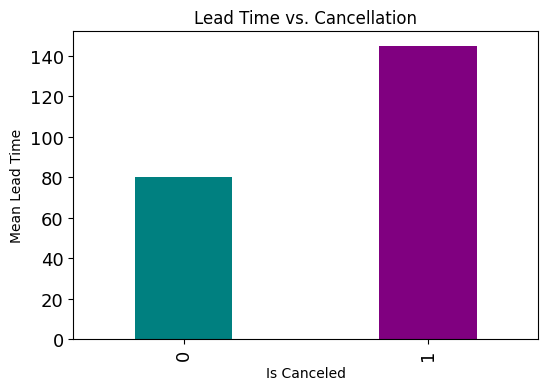

In [42]:
plt.figure(figsize=(6, 4))
mean_lead_time = df1.groupby('is_canceled')['lead_time'].mean()
mean_lead_time.plot(kind='bar', color=['teal', 'purple'], width=0.4)
plt.title('Lead Time vs. Cancellation', fontsize=12)
plt.xlabel('Is Canceled', fontsize=10)
plt.ylabel('Mean Lead Time', fontsize=10)
plt.show()

Lead Time cancellation of cancelled bookings are high

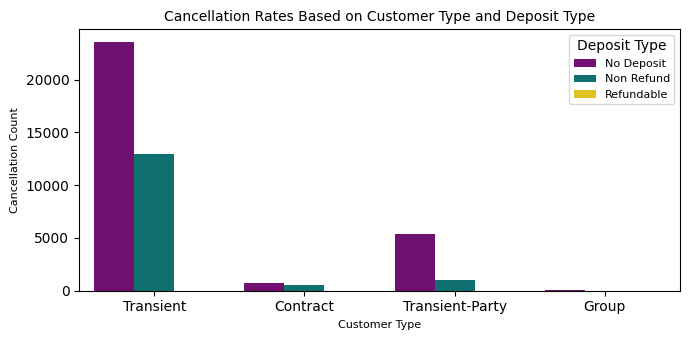

In [43]:
# Filter only the cancelled reservations
cancelled_df = df1[df1['is_canceled'] == 1]

# Set font size for labels and percentages
plt.rcParams['font.size'] = 10

# Create the plot with smaller size
plt.figure(figsize=(7, 3.5))
sns.countplot(data=cancelled_df, x='customer_type', hue='deposit_type', palette=["purple", "teal", "gold"])
plt.title('Cancellation Rates Based on Customer Type and Deposit Type', fontsize=10)
plt.xlabel('Customer Type', fontsize=8)
plt.ylabel('Cancellation Count', fontsize=8)
plt.legend(title='Deposit Type', fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

Analyzing cancelled reservations revealed that they typically occur about 145 days before the stay. "Transient" customer types, which involve individual bookings without obligations, showed the highest cancellation rates. Reservations with "No Deposit" as the payment type had the most cancellations, indicating a link between no upfront payment and higher cancellation rates. Guests tend to cancel more often in "No Deposit" bookings, followed by "Non Refundable," with the least cancellations in "Refundable" bookings, suggesting a preference for flexible options. These findings underscore the importance for hotels to adjust their booking policies to minimize cancellations and improve guest satisfaction.

In [44]:
import plotly.express as px
continent_counts = df1['continent'].value_counts(normalize=True).reset_index()
continent_counts.columns = ['continent', 'proportion']

# Create a pie chart using Plotly Express
fig = px.pie(continent_counts,
             values='proportion',
             names='continent',
             title='Bookings Continent Wise',
             color_discrete_sequence=['teal', 'purple', 'gold', 'green', 'orange'],
             hole=0.3)  # Adding a hole makes it a donut chart

# Adjust font size and layout
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=11)
fig.update_layout(title_font_size=14, legend_font_size=10)

# Show the plot
fig.show()

Europe has the highest number of bookings compared to other continents such as America and Asia, which have lower booking.

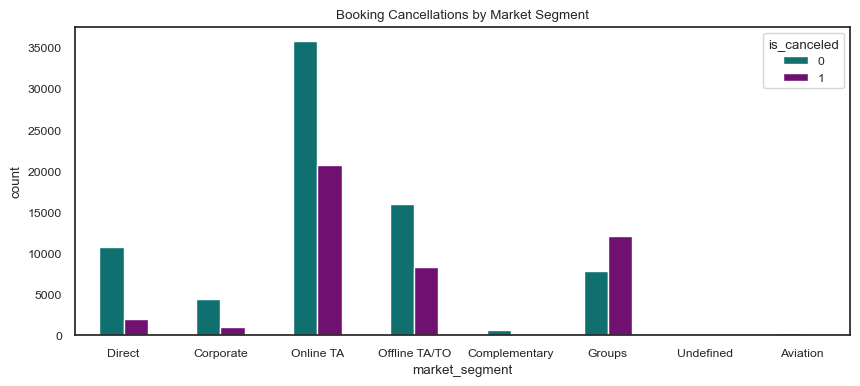

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to remove grid lines and adjust font size
sns.set(style="white", font_scale=0.8)  # Adjust font scale as needed

# Create the countplot
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='market_segment', hue='is_canceled', palette=['teal', 'purple'], width=0.5)

# Add title
plt.title('Booking Cancellations by Market Segment')

# Display the plot
plt.show()

Online Travel Agencies (Online TA) have the highest bookings and a significant number of cancellations.
Groups have a high cancellation rate.
Offline Travel Agencies/Tour Operators (Offline TA/TO) also have notable bookings and cancellations.
Direct and Corporate segments show lower cancellation rates.
Complementary, Undefined, and Aviation segments have minimal bookings and cancellations.

There was a rise of booking in 2016 from 2015 and then 2017 it got lowered to 40000 bookings

In [46]:
import plotly.express as px

# Assuming 'df1' and 'yearly_guest_arrivals' are already defined
yearly_guest_arrivals = df1.groupby('arrival_date_year')['is_canceled'].count().reset_index()

# Create a line chart with smoothed line and trendline
fig = px.line(yearly_guest_arrivals,
              x='arrival_date_year',
              y='is_canceled',  # Count of arrivals
              title='Yearly Guest Arrivals',
              labels={'arrival_date_year': 'Year', 'is_canceled': 'Number of Guest Arrivals'},
              markers=True,
              line_shape='spline',  # Smoothed line shape
              render_mode='svg'  # Render mode for smoother lines
              )

# Customize layout for better presentation
fig.update_layout(
    xaxis=dict(
        title='Year',
        tickmode='linear',  # Ensure even spacing of ticks
        dtick=1,  # Set tick interval to 1 year
        showgrid=True,  # Show gridlines
        gridcolor='lightgrey',  # Lighter gridlines for better readability
    ),
    yaxis=dict(
        title='Number of Guest Arrivals',
        showgrid=True,  # Show gridlines
        gridcolor='lightgrey',  # Lighter gridlines
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    showlegend=False,  # Hide legend for a cleaner look
)

# Show the plot
fig.show()

There was a rise of booking in 2016 from 2015 and then 2017 it got lowered to 40000 bookings

In [47]:
import plotly.express as px

# Filter and group data for non-canceled bookings by country
top_countries = df1[df1['is_canceled'] == 0].groupby(['country']).size().reset_index(name='count')

# Create choropleth map using Plotly Express
fig = px.choropleth(top_countries,
                    locations="country",
                    color="count",
                    hover_name="country",
                    color_continuous_scale=["white", "gold", "olive", "purple"],
                    projection='orthographic',
                    title="Top Origin Countries of Visitors"
             )

# Show the plot
fig.show()

In [48]:
import plotly.express as px

# Filter and group data for non-canceled bookings by country
top_countries = df1[df1['is_canceled'] == 0].groupby(['country']).size().reset_index(name='count')

# Create a treemap
fig = px.treemap(top_countries,
                 path=['country'],
                 values='count',
                 title='Top Origin Countries of Visitors',
                 color='count',
                 color_continuous_scale=["teal", "purple"])

# Show the plot
fig.show()

Based on the chart output, we can identify the top countries from which customers are arriving. The highest number of customers come from countries such as Portugal (PRT), Germany (DEU), United Kingdom (GBR), France (FRA), and Spain (FSp), all of which are European countries. This chart indicates that there are likely geographical preferences for customer arrivals at this hotel from these countries.

### Encoding Categorical Vairables

#### Ordinal Encoding

It is a technique used to transform categorical values into numerical values when those categorical values have a natural order. For example, the months of the year have a natural order (January, February, March, etc.), so we use ordinal encoding to assign a numerical value to each month, reflecting their order.

In [49]:
# Define the order of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a dictionary mapping each month to an ordinal number
month_to_ordinal = {month: i+1 for i, month in enumerate(months)}

# Apply the mapping to the DataFrame
df_cat['arrival_date_month'] = df_cat['arrival_date_month'].map(month_to_ordinal)

#### Label Encoding

The reserved room types and assigned room types in the hotel dataset (A,B,C,.....etc) were encoded using LabelEncoder for machine learning model compatibility.

In [50]:
label_encoder = LabelEncoder()
df_cat['reserved_room_type'] = label_encoder.fit_transform(df_cat['reserved_room_type'])
df_cat['assigned_room_type'] = label_encoder.fit_transform(df_cat['assigned_room_type'])

In [51]:
df_cat.head()

hotel  arrival_date_month meal market_segment distribution_channel  \
0  Resort Hotel                   7   BB         Direct               Direct   
1  Resort Hotel                   7   BB         Direct               Direct   
2  Resort Hotel                   7   BB         Direct               Direct   
3  Resort Hotel                   7   BB      Corporate            Corporate   
4  Resort Hotel                   7   BB      Online TA                TA/TO   

   reserved_room_type  assigned_room_type deposit_type customer_type  \
0                   2                   2   No Deposit     Transient   
1                   2                   2   No Deposit     Transient   
2                   0                   2   No Deposit     Transient   
3                   0                   0   No Deposit     Transient   
4                   0                   0   No Deposit     Transient   

   is_repeated_guest continent  
0                  0    Europe  
1                  0    Europe  
2                  0    Europe  
3                  0    Europe  
4                  0    Europe

In [52]:
# added converted columns to numerical dataframe df_num
df_num['arrival_date_month'] = df_cat['arrival_date_month']
df_num['reserved_room_type'] = df_cat['reserved_room_type']
df_num['assigned_room_type'] = df_cat['assigned_room_type']
df_num.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0        342               2015                        27   
1            0        737               2015                        27   
2            0          7               2015                        27   
3            0         13               2015                        27   
4            0         14               2015                        27   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        0                     0   
1                          1                        0                     0   
2                          1                        0                     1   
3                          1                        0                     1   
4                          1                        0                     2   

   adults  children  babies  previous_cancellations  \
0       2       0.0       0                       0   
1       2       0.0       0                       0   
2       1       0.0       0                       0   
3       1       0.0       0                       0   
4       2       0.0       0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                4                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  \
0   0.0                            0                          0   
1   0.0                            0                          0   
2  75.0                            0                          0   
3  75.0                            0                          0   
4  98.0                            0                          1   

   arrival_date_month  reserved_room_type  assigned_room_type  
0                   7                   2                   2  
1                   7                   2                   2  
2                   7                   0                   2  
3                   7                   0                   0  
4                   7                   0                   0

In [53]:
df_cat.drop(['arrival_date_month','assigned_room_type','reserved_room_type'],axis=True,inplace=True)

In [54]:
df_cat.columns

Index(['hotel', 'meal', 'market_segment', 'distribution_channel',
       'deposit_type', 'customer_type', 'is_repeated_guest', 'continent'],
      dtype='object')

hotel


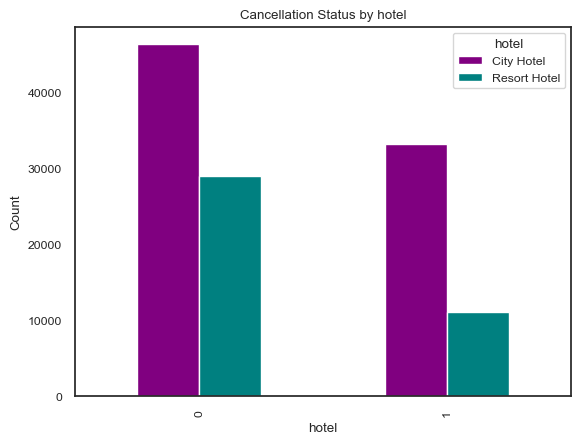

meal


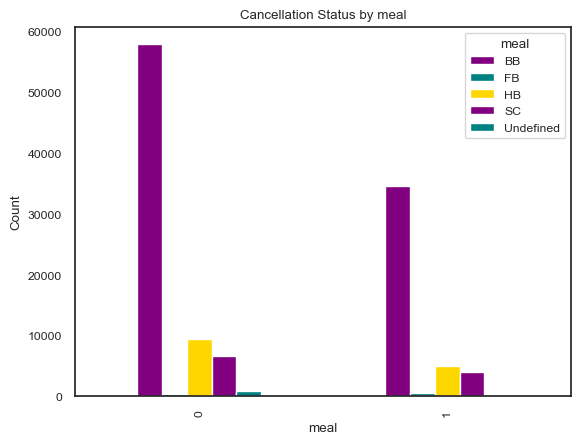

market_segment


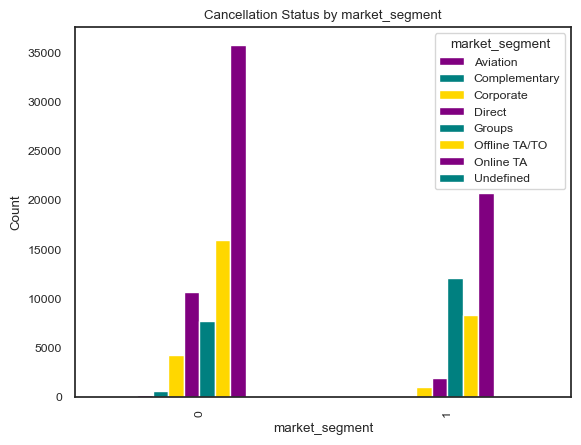

distribution_channel


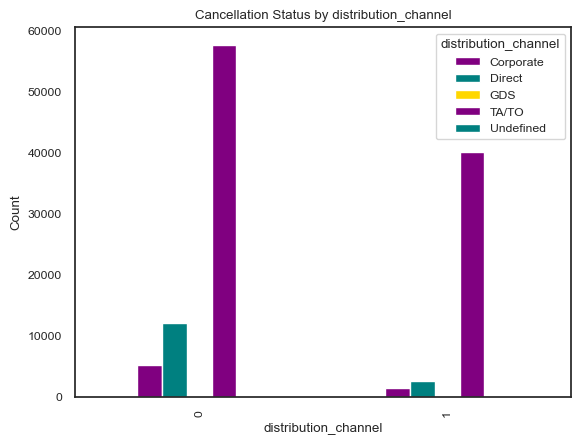

deposit_type


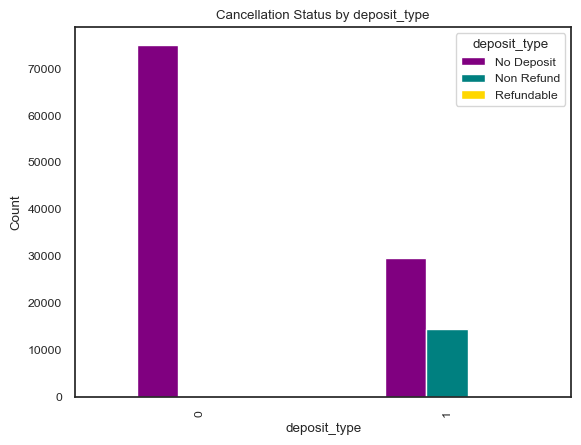

customer_type


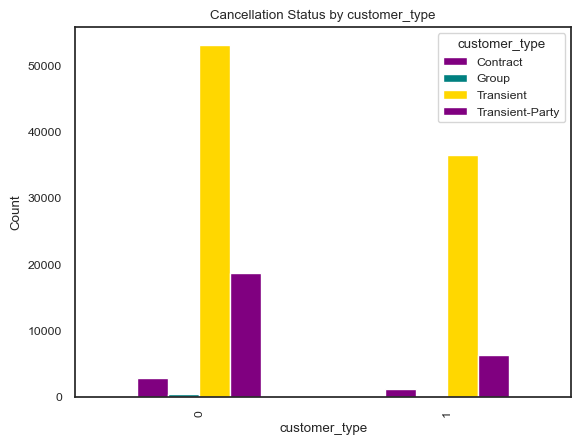

is_repeated_guest


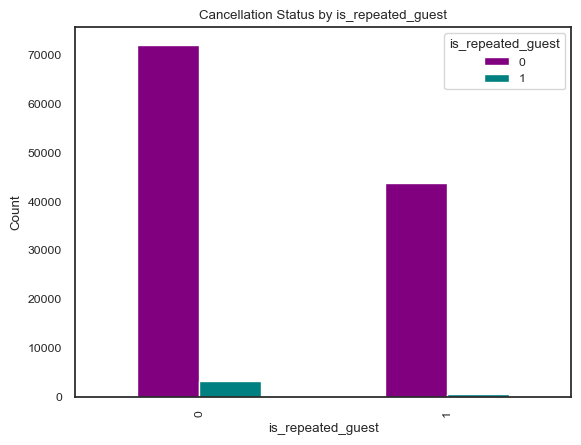

continent


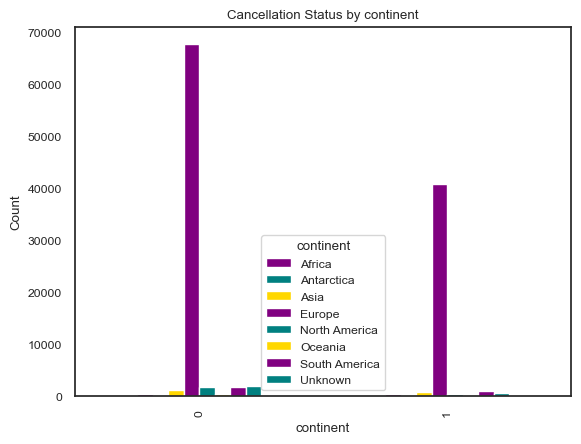

In [55]:
for i in df_cat.columns:
    print(i)
    # Create the crosstab
    ct = pd.crosstab(df['is_canceled'], df_cat[i])
    
    # Plot the crosstab
    ax = ct.plot(kind='bar', color=["purple", "teal", "gold"])
    
    # Set plot title and labels for clarity
    ax.set_title(f'Cancellation Status by {i}')
    ax.set_xlabel(f'{i}')
    ax.set_ylabel('Count')
    
    # Show the plot
    plt.show()


In [56]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df_cat['market_segment'],df_cat['distribution_channel']))

Chi2ContingencyResult(statistic=228659.92234098696, pvalue=0.0, dof=28, expected_freq=array([[1.32544518e+01, 2.90716559e+01, 3.83122540e-01, 1.94280844e+02,
        9.92545439e-03],
       [4.15529860e+01, 9.11402546e+01, 1.20109724e+00, 6.09074546e+02,
        3.11165089e-02],
       [2.96127942e+02, 6.49512313e+02, 8.55963649e+00, 4.34057836e+03,
        2.21752241e-01],
       [7.05002613e+02, 1.54631770e+03, 2.03782394e+01, 1.03337735e+04,
        5.27933663e-01],
       [1.10794913e+03, 2.43012057e+03, 3.20254879e+01, 1.62400751e+04,
        8.29675852e-01],
       [1.35447075e+03, 2.97082884e+03, 3.91512438e+01, 1.98535349e+04,
        1.01428093e+00],
       [3.15853027e+03, 6.92776334e+03, 9.12979395e+01, 4.62970432e+04,
        2.36523159e+00],
       [1.11851914e-01, 2.45330430e-01, 3.23310160e-03, 1.63950080e+00,
        8.37591088e-05]]))

#### One-Hot Encoding

In [57]:
df_cat = pd.get_dummies(data=df_cat,
                        columns=['hotel', 'meal', 'market_segment','distribution_channel',
                                 'deposit_type', 'customer_type', 'continent'],
                        dtype=int,
                        drop_first=True)

In [58]:
df_cat.head()

is_repeated_guest  hotel_Resort Hotel  meal_FB  meal_HB  meal_SC  \
0                  0                   1        0        0        0   
1                  0                   1        0        0        0   
2                  0                   1        0        0        0   
3                  0                   1        0        0        0   
4                  0                   1        0        0        0   

   meal_Undefined  market_segment_Complementary  market_segment_Corporate  \
0               0                             0                         0   
1               0                             0                         0   
2               0                             0                         0   
3               0                             0                         1   
4               0                             0                         0   

   market_segment_Direct  market_segment_Groups  market_segment_Offline TA/TO  \
0                      1                      0                             0   
1                      1                      0                             0   
2                      1                      0                             0   
3                      0                      0                             0   
4                      0                      0                             0   

   market_segment_Online TA  market_segment_Undefined  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         1                         0   

   distribution_channel_Direct  distribution_channel_GDS  \
0                            1                         0   
1                            1                         0   
2                            1                         0   
3                            0                         0   
4                            0                         0   

   distribution_channel_TA/TO  distribution_channel_Undefined  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           1                               0   

   deposit_type_Non Refund  deposit_type_Refundable  customer_type_Group  \
0                        0                        0                    0   
1                        0                        0                    0   
2                        0                        0                    0   
3                        0                        0                    0   
4                        0                        0                    0   

   customer_type_Transient  customer_type_Transient-Party  \
0                        1                              0   
1                        1                              0   
2                        1                              0   
3                        1                              0   
4                        1                              0   

   continent_Antarctica  continent_Asia  continent_Europe  \
0                     0               0                 1   
1                     0               0                 1   
2                     0               0                 1   
3                     0               0                 1   
4                     0               0                 1   

   continent_North America  continent_Oceania  continent_South America  \
0                        0                  0                        0   
1                        0                  0                        0   
2                        0                  0                        0   
3                        0                  

In [59]:
df_cat.shape

(119390, 29)

### Scaling Numeric Variables

In [60]:
min_max_scale = MinMaxScaler()
for c in df_num.drop('is_canceled',axis=1).columns:
    df_num[c] = min_max_scale.fit_transform(df_num[[c]])

In [61]:
df_num.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0   0.464043                0.0                       0.5   
1            0   1.000000                0.0                       0.5   
2            0   0.009498                0.0                       0.5   
3            0   0.017639                0.0                       0.5   
4            0   0.018996                0.0                       0.5   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        0.0                      0.0                  0.00   
1                        0.0                      0.0                  0.00   
2                        0.0                      0.0                  0.02   
3                        0.0                      0.0                  0.02   
4                        0.0                      0.0                  0.04   

     adults  children  babies  previous_cancellations  \
0  0.036364       0.0     0.0                     0.0   
1  0.036364       0.0     0.0                     0.0   
2  0.018182       0.0     0.0                     0.0   
3  0.018182       0.0     0.0                     0.0   
4  0.036364       0.0     0.0                     0.0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                             0.0         0.142857                   0.0   
1                             0.0         0.190476                   0.0   
2                             0.0         0.000000                   0.0   
3                             0.0         0.000000                   0.0   
4                             0.0         0.000000                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.001180                          0.0                        0.0   
1  0.001180                          0.0                        0.0   
2  0.015053                          0.0                        0.0   
3  0.015053                          0.0                        0.0   
4  0.019307                          0.0                        0.2   

   arrival_date_month  reserved_room_type  assigned_room_type  
0            0.545455            0.222222            0.181818  
1            0.545455            0.222222            0.181818  
2            0.545455            0.000000            0.181818  
3            0.545455            0.000000            0.000000  
4            0.545455            0.000000            0.000000

In [62]:
# New dataframe with encoded and scaled variables for model building.
df_final = pd.concat([df_num,df_cat],axis=1)
df_final.head()

is_canceled  lead_time  arrival_date_year  arrival_date_week_number  \
0            0   0.464043                0.0                       0.5   
1            0   1.000000                0.0                       0.5   
2            0   0.009498                0.0                       0.5   
3            0   0.017639                0.0                       0.5   
4            0   0.018996                0.0                       0.5   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        0.0                      0.0                  0.00   
1                        0.0                      0.0                  0.00   
2                        0.0                      0.0                  0.02   
3                        0.0                      0.0                  0.02   
4                        0.0                      0.0                  0.04   

     adults  children  babies  previous_cancellations  \
0  0.036364       0.0     0.0                     0.0   
1  0.036364       0.0     0.0                     0.0   
2  0.018182       0.0     0.0                     0.0   
3  0.018182       0.0     0.0                     0.0   
4  0.036364       0.0     0.0                     0.0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                             0.0         0.142857                   0.0   
1                             0.0         0.190476                   0.0   
2                             0.0         0.000000                   0.0   
3                             0.0         0.000000                   0.0   
4                             0.0         0.000000                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.001180                          0.0                        0.0   
1  0.001180                          0.0                        0.0   
2  0.015053                          0.0                        0.0   
3  0.015053                          0.0                        0.0   
4  0.019307                          0.0                        0.2   

   arrival_date_month  reserved_room_type  assigned_room_type  \
0            0.545455            0.222222            0.181818   
1            0.545455            0.222222            0.181818   
2            0.545455            0.000000            0.181818   
3            0.545455            0.000000            0.000000   
4            0.545455            0.000000            0.000000   

   is_repeated_guest  hotel_Resort Hotel  meal_FB  meal_HB  meal_SC  \
0                  0                   1        0        0        0   
1                  0                   1        0        0        0   
2                  0                   1        0        0        0   
3                  0                   1        0        0        0   
4                  0                   1        0        0        0   

   meal_Undefined  market_segment_Complementary  market_segment_Corporate  \
0               0                             0                         0   
1               0                             0                         0   
2               0                             0                         0   
3               0                             0                         1   
4               0                             0                         0   

   market_segment_Direct  market_segment_Groups  market_segment_Offline TA/TO  \
0                      1                      0                             0   
1                      1                      0                             0   
2                      1                      0                             0   
3                      0                      0                             0   
4                      0                      0                             0   

   market_segment_Online TA  market_segment_Undefined  \
0                         0    

In [63]:
df_final.describe().T

count      mean       std  min       25%  \
is_canceled                     119390.0  0.370416  0.482918  0.0  0.000000   
lead_time                       119390.0  0.141128  0.144997  0.0  0.024423   
arrival_date_year               119390.0  0.578277  0.353738  0.0  0.500000   
arrival_date_week_number        119390.0  0.503176  0.261637  0.0  0.288462   
arrival_date_day_of_month       119390.0  0.493275  0.292694  0.0  0.233333   
stays_in_weekend_nights         119390.0  0.048821  0.052559  0.0  0.000000   
stays_in_week_nights            119390.0  0.050006  0.038166  0.0  0.020000   
adults                          119390.0  0.033753  0.010532  0.0  0.036364   
children                        119390.0  0.010389  0.039856  0.0  0.000000   
babies                          119390.0  0.000795  0.009744  0.0  0.000000   
previous_cancellations          119390.0  0.003351  0.032474  0.0  0.000000   
previous_bookings_not_canceled  119390.0  0.001904  0.020798  0.0  0.000000   
booking_changes                 119390.0  0.010530  0.031062  0.0  0.000000   
days_in_waiting_list            119390.0  0.005936  0.044999  0.0  0.000000   
adr                             119390.0  0.020015  0.009347  0.0  0.013996   
required_car_parking_spaces     119390.0  0.007815  0.030661  0.0  0.000000   
total_of_special_requests       119390.0  0.114273  0.158560  0.0  0.000000   
arrival_date_month              119390.0  0.504771  0.280965  0.0  0.272727   
reserved_room_type              119390.0  0.109945  0.188587  0.0  0.000000   
assigned_room_type              119390.0  0.120854  0.170797  0.0  0.000000   
is_repeated_guest               119390.0  0.031912  0.175767  0.0  0.000000   
hotel_Resort Hotel              119390.0  0.335539  0.472181  0.0  0.000000   
meal_FB                         119390.0  0.006684  0.081482  0.0  0.000000   
meal_HB                         119390.0  0.121141  0.326292  0.0  0.000000   
meal_SC                         119390.0  0.089203  0.285038  0.0  0.000000   
meal_Undefined                  119390.0  0.009791  0.098466  0.0  0.000000   
market_segment_Complementary    119390.0  0.006223  0.078642  0.0  0.000000   
market_segment_Corporate        119390.0  0.044350  0.205873  0.0  0.000000   
market_segment_Direct           119390.0  0.105587  0.307309  0.0  0.000000   
market_segment_Groups           119390.0  0.165935  0.372024  0.0  0.000000   
market_segment_Offline TA/TO    119390.0  0.202856  0.402128  0.0  0.000000   
market_segment_Online TA        119390.0  0.473046  0.499275  0.0  0.000000   
market_segment_Undefined        119390.0  0.000017  0.004093  0.0  0.000000   
distribution_channel_Direct     119390.0  0.122665  0.328054  0.0  0.000000   
distribution_channel_GDS        119390.0  0.001617  0.040174  0.0  0.000000   
distribution_channel_TA/TO      119390.0  0.819750  0.384397  0.0  1.000000   
distribution_channel_Undefined  119390.0  0.000042  0.006471  0.0  0.000000   
deposit_type_Non Refund         119390.0  0.122179  0.327494  0.0  0.000000   
deposit_type_Refundable         119390.0  0.001357  0.036811  0.0  0.000000   
customer_type_Group             119390.0  0.004833  0.069351  0.0  0.000000   
customer_type_Transient         119390.0  0.750591  0.432673  0.0  1.000000   
customer_type_Transient-Party   119390.0  0.210436  0.407620  0.0  0.000000   
continent_Antarctica            119390.0  0.000017  0.004093  0.0  0.000000   
continent_Asia                  119390.0  0.016970  0.129158  0.0  0.000000   
continent_Europe                119390.0  0.907756  0.289371  0.0  1.000000   
continent_North America         119390.0  0.018770  0.135714  0.0  0.000000   
continent_Oceania               119390.0  0.004221  0.064836  0.0  0.000000   
continent_South America         119390.0  0.022447  0.148134  0.0  0.000000   
continent_Unknown               119390.0  0.022933  0.149691  0.0  0.000000   

                                     50%       75%  max  
is_canceled               

### Spliting Dataset

In [64]:
df_final.shape

(119390, 49)

In [65]:
X = df_final.drop(['is_canceled','arrival_date_month','reserved_room_type','assigned_room_type'],axis=1)
y = df_final['is_canceled']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [66]:
x = df_final.drop(['is_canceled'],axis=1)
y1 = df_final['is_canceled']
xtrain,xtest,y1train,y1test = train_test_split(X,y,train_size=0.8,random_state=100)

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(95512, 45)
(23878, 45)
(95512,)
(23878,)


### Statistical Test

In [68]:
y_train.value_counts(normalize=True)*100

is_canceled
0    62.979521
1    37.020479
Name: proportion, dtype: float64

In [69]:
y_test.value_counts(normalize=True)*100

is_canceled
0    62.873775
1    37.126225
Name: proportion, dtype: float64

In [70]:
import statsmodels.stats.weightstats as weightstats
weightstats.ztest(y_train,y_test)

(-0.3026440587746897, 0.7621611340491565)

In [71]:
## Creating a list to store f1 score of all the models.
model_name = []
f1_score_train = []
f1_score_test = []

### Logistic Regression

In [72]:
logistic = LogisticRegression()
logistic_model = logistic.fit(X_train,y_train)
train_pred = logistic_model.predict(X_train)
test_pred = logistic_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.79      0.93      0.86     60153
           1       0.84      0.57      0.68     35359

    accuracy                           0.80     95512
   macro avg       0.81      0.75      0.77     95512
weighted avg       0.81      0.80      0.79     95512

Testing report               precision    recall  f1-score   support

           0       0.79      0.93      0.85     15013
           1       0.83      0.57      0.68      8865

    accuracy                           0.80     23878
   macro avg       0.81      0.75      0.77     23878
weighted avg       0.80      0.80      0.79     23878

Training F1 - Score 0.6799771436254243
Testing F1 - Score 0.6781362966929977


In [73]:
model_name.append('Logistic Regression')
f1_score_train.append(0.69)
f1_score_test.append(0.69)

### Decision Tree 

In [74]:
decision = DecisionTreeClassifier()
dc_model = decision.fit(X_train,y_train)
train_pred = dc_model.predict(X_train)
test_pred = dc_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.99      1.00      0.99     60153
           1       0.99      0.98      0.99     35359

    accuracy                           0.99     95512
   macro avg       0.99      0.99      0.99     95512
weighted avg       0.99      0.99      0.99     95512

Testing report               precision    recall  f1-score   support

           0       0.87      0.86      0.86     15013
           1       0.77      0.78      0.77      8865

    accuracy                           0.83     23878
   macro avg       0.82      0.82      0.82     23878
weighted avg       0.83      0.83      0.83     23878

Training F1 - Score 0.9886694815257105
Testing F1 - Score 0.771609433645174


In [75]:
model_name.append('Decision Tree')
f1_score_train.append(0.99)
f1_score_test.append(0.77)

### Random Forest

In [76]:
rf = RandomForestClassifier(random_state=10)
rf_model = rf.fit(X_train,y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.99      1.00      0.99     60153
           1       0.99      0.99      0.99     35359

    accuracy                           0.99     95512
   macro avg       0.99      0.99      0.99     95512
weighted avg       0.99      0.99      0.99     95512

Testing report               precision    recall  f1-score   support

           0       0.87      0.93      0.90     15013
           1       0.87      0.76      0.81      8865

    accuracy                           0.87     23878
   macro avg       0.87      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878

Training F1 - Score 0.9886878149173232
Testing F1 - Score 0.8118883218252777


In [77]:
model_name.append('Random Forest')
f1_score_train.append(0.98)
f1_score_test.append(0.82)

In [78]:
# feature importance
imp = rf.feature_importances_
df_imp = pd.DataFrame(zip(X_train,imp),columns=['column','importance'])
df_imp = df_imp.sort_values('importance',ascending=False)
df_imp

column  importance
0                        lead_time    0.161678
33         deposit_type_Non Refund    0.121547
13                             adr    0.110430
2         arrival_date_week_number    0.079913
3        arrival_date_day_of_month    0.078832
15       total_of_special_requests    0.062814
5             stays_in_week_nights    0.046437
9           previous_cancellations    0.043536
4          stays_in_weekend_nights    0.028730
11                 booking_changes    0.023713
1                arrival_date_year    0.022875
25           market_segment_Groups    0.021933
14     required_car_parking_spaces    0.021717
36         customer_type_Transient    0.021323
27        market_segment_Online TA    0.018033
6                           adults    0.017766
37   customer_type_Transient-Party    0.015889
26    market_segment_Offline TA/TO    0.013754
17              hotel_Resort Hotel    0.012447
7                         children    0.008481
31      distribution_channel_TA/TO    0.008283
19                         meal_HB    0.007891
40                continent_Europe    0.007076
20                         meal_SC    0.005953
29     distribution_channel_Direct    0.005459
24           market_segment_Direct    0.005045
10  previous_bookings_not_canceled    0.004264
12            days_in_waiting_list    0.004164
16               is_repeated_guest    0.002548
44               continent_Unknown    0.002526
43         continent_South America    0.002352
39                  continent_Asia    0.002177
23        market_segment_Corporate    0.002132
41         continent_North America    0.002018
18                         meal_FB    0.001532
8                           babies    0.001216
21                  meal_Undefined    0.001066
42               continent_Oceania    0.000712
34         deposit_type_Refundable    0.000527
22    market_segment_Complementary    0.000430
35             customer_type_Group    0.000421
30        distribution_channel_GDS    0.000290
32  distribution_channel_Undefined    0.000056
28        market_segment_Undefined    0.000012
38            continent_Antarctica    0.000004

### KNeighbors Classifier

In [79]:
kn = KNeighborsClassifier()
kn_model = kn.fit(X_train,y_train)
train_pred = kn_model.predict(X_train)
test_pred = kn_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.88      0.93      0.90     60153
           1       0.86      0.78      0.82     35359

    accuracy                           0.87     95512
   macro avg       0.87      0.85      0.86     95512
weighted avg       0.87      0.87      0.87     95512

Testing report               precision    recall  f1-score   support

           0       0.84      0.88      0.86     15013
           1       0.78      0.71      0.75      8865

    accuracy                           0.82     23878
   macro avg       0.81      0.80      0.80     23878
weighted avg       0.82      0.82      0.82     23878

Training F1 - Score 0.8200979664539112
Testing F1 - Score 0.745000591645959


In [80]:
model_name.append('KNeighbors Classifier')
f1_score_train.append(0.82)
f1_score_test.append(0.74)

### AdaBoost

In [81]:
ada = AdaBoostClassifier(random_state=10)
ada_model = ada.fit(X_train,y_train)
train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.81      0.93      0.86     60153
           1       0.84      0.62      0.71     35359

    accuracy                           0.81     95512
   macro avg       0.82      0.77      0.79     95512
weighted avg       0.82      0.81      0.81     95512

Testing report               precision    recall  f1-score   support

           0       0.81      0.93      0.86     15013
           1       0.83      0.62      0.71      8865

    accuracy                           0.81     23878
   macro avg       0.82      0.77      0.79     23878
weighted avg       0.82      0.81      0.81     23878

Training F1 - Score 0.7123243102550755
Testing F1 - Score 0.7109531502423264


In [82]:
model_name.append('AdaBoost')
f1_score_train.append(0.71)
f1_score_test.append(0.71)

### Gradient Boosting Classifier

In [83]:
gboost = GradientBoostingClassifier(random_state=10)
gboost_model = gboost.fit(X_train,y_train)
train_pred = gboost_model.predict(X_train)
test_pred = gboost_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.81      0.94      0.87     60153
           1       0.85      0.61      0.71     35359

    accuracy                           0.82     95512
   macro avg       0.83      0.78      0.79     95512
weighted avg       0.82      0.82      0.81     95512

Testing report               precision    recall  f1-score   support

           0       0.80      0.93      0.86     15013
           1       0.85      0.61      0.71      8865

    accuracy                           0.82     23878
   macro avg       0.83      0.77      0.79     23878
weighted avg       0.82      0.82      0.81     23878

Training F1 - Score 0.7140205948529291
Testing F1 - Score 0.7126977899829998


In [84]:
model_name.append('Gradient Boosting')
f1_score_train.append(0.71)
f1_score_test.append(0.71)

### XGBoost

In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 10,gamma=1)
xgb_model = xgb.fit(X_train,y_train)
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.87      0.94      0.91     60153
           1       0.89      0.76      0.82     35359

    accuracy                           0.88     95512
   macro avg       0.88      0.85      0.86     95512
weighted avg       0.88      0.88      0.87     95512

Testing report               precision    recall  f1-score   support

           0       0.85      0.93      0.89     15013
           1       0.85      0.73      0.78      8865

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878

Training F1 - Score 0.8194372623574145
Testing F1 - Score 0.7842278203723988


In [86]:
model_name.append('XGBoost')
f1_score_train.append(0.88)
f1_score_test.append(0.80)

In [87]:
!pip install xgboost

In [88]:
# feature importance
imp = xgb.feature_importances_
df_imp = pd.DataFrame(zip(X_train,imp),columns=['column','importance'])
df_imp = df_imp.sort_values('importance',ascending=False)
df_imp =df_imp[df_imp['importance']!=0]

In [89]:
df_imp

column  importance
33         deposit_type_Non Refund    0.714075
14     required_car_parking_spaces    0.054826
9           previous_cancellations    0.044054
27        market_segment_Online TA    0.035748
15       total_of_special_requests    0.015945
36         customer_type_Transient    0.012697
10  previous_bookings_not_canceled    0.007238
37   customer_type_Transient-Party    0.006946
11                 booking_changes    0.006858
40                continent_Europe    0.006033
18                         meal_FB    0.005696
21                  meal_Undefined    0.005352
0                        lead_time    0.005153
1                arrival_date_year    0.005042
17              hotel_Resort Hotel    0.004915
39                  continent_Asia    0.004135
26    market_segment_Offline TA/TO    0.003977
12            days_in_waiting_list    0.003877
24           market_segment_Direct    0.003720
34         deposit_type_Refundable    0.003334
16               is_repeated_guest    0.003256
25           market_segment_Groups    0.003067
19                         meal_HB    0.002706
30        distribution_channel_GDS    0.002701
29     distribution_channel_Direct    0.002588
6                           adults    0.002557
13                             adr    0.002538
2         arrival_date_week_number    0.002515
41         continent_North America    0.002504
43         continent_South America    0.002445
20                         meal_SC    0.002442
23        market_segment_Corporate    0.002333
5             stays_in_week_nights    0.002331
31      distribution_channel_TA/TO    0.002298
7                         children    0.002106
42               continent_Oceania    0.001976
44               continent_Unknown    0.001973
4          stays_in_weekend_nights    0.001965
8                           babies    0.001899
3        arrival_date_day_of_month    0.001894
35             customer_type_Group    0.001205
22    market_segment_Complementary    0.001078

In [90]:
df_report = pd.DataFrame(data = model_name,columns=['Model_Name'])
df_report['Training_F1_Score'] = f1_score_train
df_report['Testing_F1_Score'] = f1_score_test
df_report.set_index('Model_Name')

Training_F1_Score  Testing_F1_Score
Model_Name                                                
Logistic Regression                 0.69              0.69
Decision Tree                       0.99              0.77
Random Forest                       0.98              0.82
KNeighbors Classifier               0.82              0.74
AdaBoost                            0.71              0.71
Gradient Boosting                   0.71              0.71
XGBoost                             0.88              0.80

### Hyperparameter Tuning

In [91]:
Tuned_Model_Name=[]
Training_f1_Score=[]
Testing_f1_Score=[]

##### Decision_Tree

In [92]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


GSCV = GridSearchCV(estimator = decision,param_grid=parameters,scoring=f1_score,n_jobs=-1)
GSCV.fit(X_train,y_train)

print('best_parameter:',GSCV.best_params_)

best_parameter: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [93]:
## Decision_Tree

decision_tuned_model = DecisionTreeClassifier(criterion= 'gini', max_depth=10, min_samples_leaf= 1, min_samples_split= 2)
dc_model = decision_tuned_model.fit(X_train,y_train)
train_pred = dc_model.predict(X_train)
test_pred = dc_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

Training report               precision    recall  f1-score   support

           0       0.81      0.94      0.87     60153
           1       0.85      0.63      0.72     35359

    accuracy                           0.82     95512
   macro avg       0.83      0.78      0.80     95512
weighted avg       0.83      0.82      0.81     95512

Testing report               precision    recall  f1-score   support

           0       0.81      0.93      0.87     15013
           1       0.84      0.62      0.72      8865

    accuracy                           0.82     23878
   macro avg       0.83      0.78      0.79     23878
weighted avg       0.82      0.82      0.81     23878

Training F1 - Score 0.7218508494472886
Testing F1 - Score 0.7174463115551806


In [94]:
Tuned_Model_Name.append('Decision_Tree')
Training_f1_Score.append(0.72)
Testing_f1_Score.append(0.72)

##### Random_Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6],
}


GSCV = GridSearchCV(estimator = rf,param_grid=parameters,scoring=f1_score,n_jobs=-1)
GSCV.fit(X_train,y_train)

print('best_parameter:',GSCV.best_params_)

In [ ]:
## Random_Forest

rf_tuned = RandomForestClassifier(max_depth=4, min_samples_split=2, n_estimators= 100,min_samples_leaf= 1)
rf_model = rf_tuned.fit(X_train,y_train)
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

In [ ]:
Tuned_Model_Name.append('Random Forest')
Training_f1_Score.append(0.54)
Testing_f1_Score.append(0.54)

##### KNN_Classifier

In [ ]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


GSCV = GridSearchCV(estimator = kn,param_grid=parameters,scoring=f1_score,n_jobs=-1)
GSCV.fit(X_train,y_train)

print('best_parameter:',GSCV.best_params_)

In [ ]:
# KNN Classifier

kn_tuned = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'uniform')
kn_model = kn_tuned.fit(X_train,y_train)
train_pred = kn_model.predict(X_train)
test_pred = kn_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

In [ ]:
Tuned_Model_Name.append('KNearest Neighbors')
Training_f1_Score.append(0.86)
Testing_f1_Score.append(0.74)

##### AdaBoost

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

GSCV = GridSearchCV(estimator = ada,param_grid=param_grid,scoring=f1_score,n_jobs=-1)
GSCV.fit(X_train,y_train)

print('best_parameter:',GSCV.best_params_)

In [ ]:
ada_tuned_model = AdaBoostClassifier(learning_rate= 0.01, n_estimators= 50)
ada_model = ada_tuned_model.fit(X_train,y_train)
train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)

print('Training report',classification_report(y_train,train_pred))
print('Testing report',classification_report(y_test,test_pred))
print('Training F1 - Score',f1_score(y_train,train_pred))
print('Testing F1 - Score',f1_score(y_test,test_pred))

In [ ]:
Tuned_Model_Name.append('AdaBoost Classifier')
Training_f1_Score.append(0.49)
Testing_f1_Score.append(0.49)

In [ ]:
parameters = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30,],
    'min_samples_split': [2, 5, 10],
}


GSCV = GridSearchCV(estimator = rf,param_grid=parameters,scoring=f1_score,n_jobs=-1)
GSCV.fit(X_train,y_train)

print('best_parameter:',GSCV.best_params_)

In [ ]:
df_tuned_report = pd.DataFrame(Tuned_Model_Name,columns=['Tuned_models'])

df_tuned_report['Training_f1_Score'] = Training_f1_Score
df_tuned_report['Testing_f1_Score'] = Testing_f1_Score

df_tuned_report

### Conclusion